___
# Get familiar with cmath for complex analysis
___

In [3]:
import numpy as np
import cmath
import math
def complex_divider(z1, z2):
    result = z1/z2
    real = result.real
    imag = result.imag
    r , theta_rad = cmath.polar(result)
    theta_deg = math.degrees(theta_rad)
    return [result, real, imag, r, theta_rad, theta_deg]

a = complex(input("Enter the first number"))
b = complex(input("Enter the second number"))
complex_divider(a,b)

[(0.41379310344827586-0.03448275862068965j),
 0.41379310344827586,
 -0.03448275862068965,
 0.41522739926869984,
 -0.08314123188844122,
 -4.763641690726177]

___
# Chech to see if a complex number is analytic according to Cauchy-Riemann rules
___

In [20]:
import sympy as smp
import numpy as np
import cmath
def Check_CRE(u, v):
    x, y = smp.symbols('x, y', real=True)
    check1 = smp.diff(u,x) == smp.diff(v,y)
    check2 = smp.diff(u,y) == -smp.diff(v,x)
    check3 = smp.diff(u,x) == -smp.diff(v,y)
    check4 = smp.diff(u,y) == smp.diff(v,x)
    if ((check1 and check2) or ( check3 and check4)):
        print('yes')
    else:
        print("No")

u_str = input("Enter the real part")
v_str = input("Enter the imaginary part")
u = smp.sympify(u_str)
v = smp.sympify(v_str)
Check_CRE(u, v)
print(f"({u}) + ({v})j")



yes
(7**y + 4*x) + (5**x - 4)j


___
# Plotting Heat flow and stremlines using contours
___

Plot generated! Look for the 90-degree intersections.


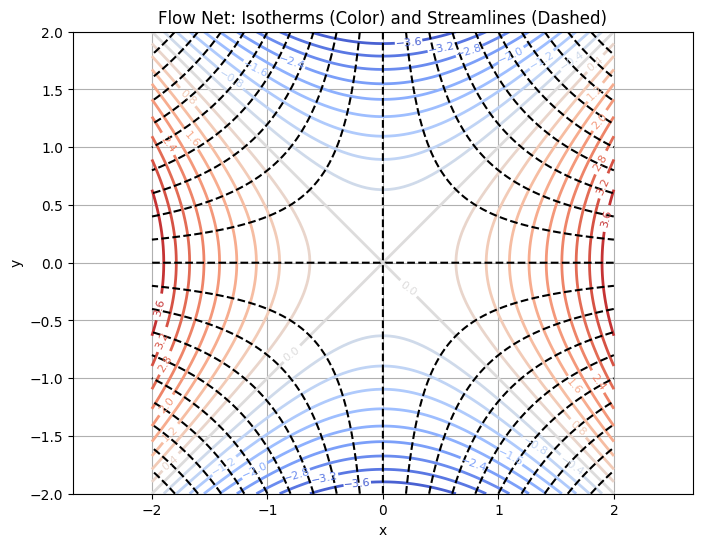

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_flow_net():
    x_range = np.linspace(-2, 2, 100)
    y_range = np.linspace(-2, 2, 100)
    x, y = np.meshgrid(x_range, y_range)
    
    u = x**2 - y**2
    v = 2*x*y
    
    plt.figure(figsize=(8, 6))
    cp_u = plt.contour(x, y, u, levels=20, cmap='coolwarm', linewidths=2)
    cp_v = plt.contour(x, y, v, levels=20, colors='black', linestyles='dashed', linewidths=1.5)
    
    plt.clabel(cp_u, inline=True, fontsize=8) 
    plt.title("Flow Net: Isotherms (Color) and Streamlines (Dashed)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.axis('equal') 
    
    print("Plot generated! Look for the 90-degree intersections.")
    plt.show()

plot_flow_net()

---
# A function to check if a function is harmonic and if it is, find its imaginary partner
---

In [2]:
import sympy as smp

def Harmonic_func(u_str):
    x, y = smp.symbols('x y', real=True)
    C = smp.symbols('C') # Constant of integration
    
    # 1. Parse Input
    u = smp.sympify(u_str)
    
    # 2. Check Laplacian
    laplacian = smp.simplify(smp.diff(u, x, 2) + smp.diff(u, y, 2))
    
    if laplacian != 0:
        print(f"❌ Not a harmonic function! (Laplacian = {laplacian})")
        return

    print("✅ It is Harmonic. Calculating v(x,y)...")

    # --- THE INTEGRATION METHOD ---
    
    # Step A: Use first CR equation (dv/dy = du/dx)
    # Integrate du/dx with respect to y to find the main part of v
    du_dx = smp.diff(u, x)
    v_partial = smp.integrate(du_dx, y)
    
    # Step B: Use second CR equation (dv/dx = -du/dy) to find the missing x-terms
    # Calculate what dv/dx SHOULD be based on u
    target_dv_dx = -smp.diff(u, y)
    
    # Calculate what our current v_partial gives for dv/dx
    current_dv_dx = smp.diff(v_partial, x)
    
    # The difference is the derivative of our missing function h(x)
    h_prime = target_dv_dx - current_dv_dx
    
    # Integrate to find h(x)
    h_x = smp.integrate(h_prime, x)
    
    # Step C: Combine them
    v = v_partial + h_x + C
    
    print(f"result v(x,y) = {v}")

# --- Run it ---
u_input = input("Enter u(x,y) (e.g. x**2 - y**2): ")
Harmonic_func(u_input)

✅ It is Harmonic. Calculating v(x,y)...
result v(x,y) = C


# Capstone Project: Thermal & Flux Analysis of a Micro-Component
**Course:** Engineering Mathematics | **Unit:** Complex Analysis (Chapter 9)

## 1. Project Scenario
You are a thermal engineer designing a micro-heat sink with a specific geometric groove. A preliminary theoretical model suggests that the steady-state **Temperature Distribution** $T(x,y)$ (in degrees Celsius) across the component's cross-section is given by the real part of a complex function.

The proposed temperature function $u(x,y)$ is:
$$u(x,y) = e^x \cos(y) - x^3 + 3xy^2$$

Your job is to validate this model, derive the associated Heat Flux lines (the flow of energy), and visualize the system.

---

## 2. Theoretical Tasks (Manual Calculation)

### **Part A: Complex Numbers & Geometry (Section 9-1)**
The component is physically bounded in the region defined by the complex inequality:
$$D = \{ z \in \mathbb{C} \mid |z| \le 2, \text{Im}(z) \ge 0 \}$$

1.  **Sketch the Domain:** Draw the region $D$ on the Argand plane.
2.  **Point Evaluation:** Convert the complex point $z_0 = 1 + i\sqrt{3}$ into Polar Form ($re^{i\theta}$) and calculate the temperature $u(x,y)$ at this specific point.

### **Part B: Limits & Continuity (Section 9-2)**
A competing engineer suggests that near the sharp corner at $z = 0$, the function might behave erratically. They propose a "test function" for the error term:
$$E(z) = \frac{(\bar{z})^2}{z^2}$$

1.  **The Path Test:** Investigate the limit $\lim_{z \to 0} E(z)$.
    * Calculate the limit approaching along the real axis ($y=0$).
    * Calculate the limit approaching along the line $y=x$.
2.  **Conclusion:** Is the error function continuous at the origin? Explain what this implies for numerical stability at the sharp corner.

### **Part C: Analyticity & Physical Validity (Section 9-3 & 9-4)**
For a temperature field to be physically valid in steady-state, it must satisfy the **Laplace Equation** ($\nabla^2 u = 0$).

1.  **Harmonic Check:** Calculate the second partial derivatives ($u_{xx}$ and $u_{yy}$) and verify that $\nabla^2 u = 0$.
2.  **Analyticity:** Explain why satisfying the Laplace equation implies that $u(x,y)$ is the real part of an **Analytic Function** $f(z)$.

### **Part D: The Heat Flux Field (Harmonic Conjugates)**
The "Streamlines" of heat flow are perpendicular to the temperature isotherms. These are represented by the imaginary part $v(x,y)$ of the complex potential $f(z) = u + iv$.

1.  **Derivation:** Use the **Cauchy-Riemann Equations** to find the function $v(x,y)$.
    * *Hint:* Integrate $\frac{\partial v}{\partial y} = \frac{\partial u}{\partial x}$ first.
    * Then, differentiate with respect to $x$ and use $\frac{\partial v}{\partial x} = -\frac{\partial u}{\partial y}$ to find the integration constant.
2.  **The Complex Potential:** Write the final function $f(z)$ in terms of $z$ (Simplifying $u+iv$ into a function of $z$).

---

## 3. Computational Task (Python Simulation)

Write a Python script to visualize the invisible thermal field.

**Requirements:**
1.  **Define a Grid:** Create a mesh of points covering the domain $[-2, 2] \times [0, 2]$.
2.  **Compute Fields:** Calculate the values of $u$ (Temperature) and $v$ (Flux) derived in Part D.
3.  **Visualization:**
    * Plot the **Isotherms** (Lines of constant Temperature) in **Red**.
    * Plot the **Flux Lines** (Lines of constant $v$) in **Blue** (dashed).
    * **Verify Orthogonality:** Ensure the plot aspect ratio is 'equal' so the red and blue lines clearly intersect at $90^\circ$.

   CAPSTONE PROJECT: THERMAL ANALYSIS OF MICRO-COMPONENT

--- PART A: Evaluation at z0 = 1 + i*sqrt(3) ---
Exact Value:  E*cos(sqrt(3)) + 8
Approx Value: 7.5636 °C

--- PART B: Limit Test for Singularity at Origin ---
Limit along y=0: 1
Limit along y=x: (1 - I)**2/(1 + I)**2
>> CONCLUSION: Limit does not exist. Discontinuous at origin.

--- PART C: Verifying Laplace Equation ---
d^2u/dx^2: -6*x + exp(x)*cos(y)
d^2u/dy^2: 6*x - exp(x)*cos(y)
Laplacian (Sum): 0
>> RESULT: VALID. The function is Harmonic.

--- PART D: Deriving Flux Function v(x,y) ---
Calculated Flux v(x,y): -3*x**2*y + y**3 + exp(x)*sin(y)
Complex Potential f(z): -x**3 + 3*x*y**2 + exp(x)*cos(y) + i*(-3*x**2*y + y**3 + exp(x)*sin(y))

--- PART E: Generating Simulation Plot... ---


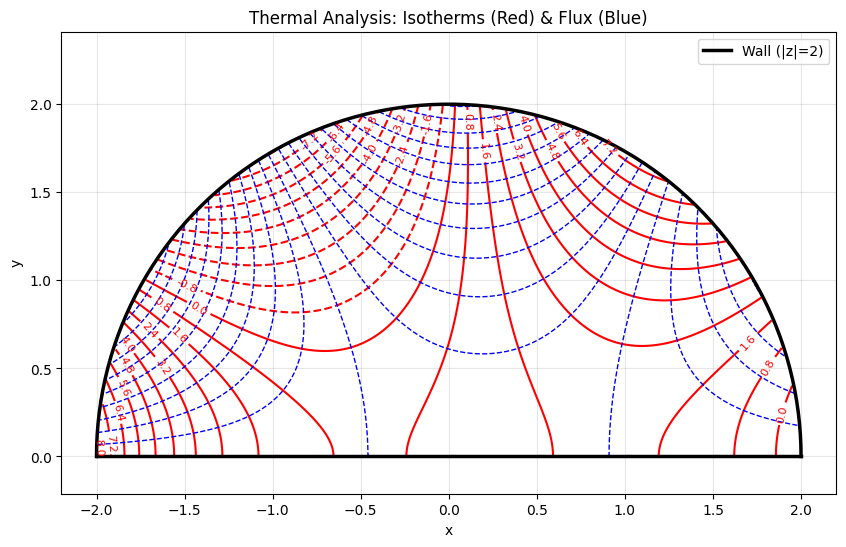

>> Simulation Complete. Check the popup window.


In [ ]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

def Thermal_Analysis():
    print("=======================================================")
    print("   CAPSTONE PROJECT: THERMAL ANALYSIS OF MICRO-COMPONENT")
    print("=======================================================\n")

    # Define Symbols
    x, y = smp.symbols('x y', real=True)
    z = x + smp.I*y
    
    # Define the proposed Temperature Model u(x,y)
    u = smp.exp(x) * smp.cos(y) - x**3 + 3*x*y**2
    
    # ---------------------------------------------------------
    # PART A: POINT EVALUATION
    # ---------------------------------------------------------
    print("--- PART A: Evaluation at z0 = 1 + i*sqrt(3) ---")
    
    # z0 coordinates: x=1, y=sqrt(3)
    val_exact = u.subs({x: 1, y: smp.sqrt(3)})
    val_approx = val_exact.evalf()
    
    print(f"Exact Value:  {val_exact}")
    print(f"Approx Value: {val_approx:.4f} °C\n")

    # ---------------------------------------------------------
    # PART B: LIMITS (SINGULARITY CHECK)
    # ---------------------------------------------------------
    print("--- PART B: Limit Test for Singularity at Origin ---")
    # Error Function E(z) = (conj(z)^2) / z^2
    z_sym = x + smp.I*y
    z_bar = x - smp.I*y
    E = (z_bar**2) / (z_sym**2)
    
    # Path 1: Along Real Axis (y = 0)
    E_path1 = E.subs(y, 0)
    lim_1 = smp.limit(E_path1, x, 0)
    print(f"Limit along y=0: {lim_1}")
    
    # Path 2: Along Diagonal (y = x)
    E_path2 = E.subs(y, x)
    lim_2 = smp.limit(E_path2, x, 0)
    print(f"Limit along y=x: {lim_2}")
    
    if lim_1 != lim_2:
        print(">> CONCLUSION: Limit does not exist. Discontinuous at origin.\n")
    else:
        print(">> CONCLUSION: Limit exists.\n")

    # ---------------------------------------------------------
    # PART C: LAPLACE CHECK (ANALYTICITY)
    # ---------------------------------------------------------
    print("--- PART C: Verifying Laplace Equation ---")
    u_xx = smp.diff(u, x, 2)
    u_yy = smp.diff(u, y, 2)
    laplacian = smp.simplify(u_xx + u_yy)
    
    print(f"d^2u/dx^2: {u_xx}")
    print(f"d^2u/dy^2: {u_yy}")
    print(f"Laplacian (Sum): {laplacian}")
    
    if laplacian == 0:
        print(">> RESULT: VALID. The function is Harmonic.\n")
    else:
        print(">> RESULT: INVALID. Not Harmonic.\n")

    # ---------------------------------------------------------
    # PART D: DERIVING HEAT FLUX v(x,y)
    # ---------------------------------------------------------
    print("--- PART D: Deriving Flux Function v(x,y) ---")
    
    # 1. Use Cauchy-Riemann: dv/dy = du/dx
    du_dx = smp.diff(u, x)
    v_partial = smp.integrate(du_dx, y)
    
    # 2. Use Cauchy-Riemann: dv/dx = -du/dy
    target_dv_dx = -smp.diff(u, y)
    current_dv_dx = smp.diff(v_partial, x)
    
    # Find missing function h(x)
    h_prime = target_dv_dx - current_dv_dx
    h_x = smp.integrate(h_prime, x)
    
    # Final v
    v = v_partial + h_x # (+ C, usually taken as 0)
    v = smp.simplify(v)
    
    print(f"Calculated Flux v(x,y): {v}")
    
    # Reconstruct f(z)
    f_z_expr = smp.simplify(u + smp.I*v)
    # We try to simplify it into z terms for display
    # (SymPy sometimes struggles to perfectly factor e^z - z^3 automatically without hints, 
    # but we will display the x,y form)
    print(f"Complex Potential f(z): {u} + i*({v})\n")

    # ---------------------------------------------------------
    # PART E: VISUALIZATION (SIMULATION)
    # ---------------------------------------------------------
    print("--- PART E: Generating Simulation Plot... ---")
    
    # Create numeric functions from the symbolic expressions
    u_func = smp.lambdify((x, y), u, "numpy")
    v_func = smp.lambdify((x, y), v, "numpy")
    
    # Grid Setup (Semi-Circle bounding box)
    x_vals = np.linspace(-2.2, 2.2, 300)
    y_vals = np.linspace(0, 2.2, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    # Compute Data
    U_data = u_func(X, Y)
    V_data = v_func(X, Y)
    
    # Masking: Hide values outside the semi-circle (Geometry Constraint)
    # Domain: |z| <= 2
    R = np.sqrt(X**2 + Y**2)
    U_data[R > 2] = np.nan
    V_data[R > 2] = np.nan

    # Plotting
    plt.figure(figsize=(10, 6))
    
    # 1. Temperature Contours (Red)
    cp_u = plt.contour(X, Y, U_data, levels=20, colors='red', linewidths=1.5)
    plt.clabel(cp_u, inline=True, fontsize=8, fmt='%.1f')
    
    # 2. Flux Contours (Blue Dashed)
    cp_v = plt.contour(X, Y, V_data, levels=20, colors='blue', linestyles='dashed', linewidths=1)
    
    # 3. Draw Component Boundary
    theta = np.linspace(0, np.pi, 100)
    plt.plot(2*np.cos(theta), 2*np.sin(theta), 'k-', linewidth=2.5, label='Wall (|z|=2)')
    plt.plot([-2, 2], [0, 0], 'k-', linewidth=2.5) # Base
    
    plt.title("Thermal Analysis: Isotherms (Red) & Flux (Blue)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.axis('equal')
    plt.grid(True, alpha=0.3)
    
    plt.show()
    print(">> Simulation Complete. Check the popup window.")

if __name__ == "__main__":
    Thermal_Analysis()